# LDA Topic Modeling
Using gensim LDA to implements topic modeling 



## Imports

In [3]:
import pandas as pd
from pandas import DataFrame
import nltk
from nltk import FreqDist
import pandas as pd
pd.set_option("display.max_colwidth", 200)
import numpy as np
import re
import spacy
from nltk.corpus import stopwords
import pickle 
# from wordcloud import WordCloud

# Gensim
import gensim
from gensim import corpora, models
from gensim.models import CoherenceModel, LdaModel, LdaMulticore
# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
# run file contains custom functions
%run -i '../scripts/helper_functions.py'

/Users/shuotian/GitHub/Cannabis Market Analytics/scripts/helper_functions.py:29: DeprecationWarning: invalid escape sequence \d
  text = re.sub("\d+", " ", text)  # remove digits


## Load Data

In [6]:
df = pd.read_csv('../data/Cannabis_reviews.csv')
df.head(1)

,review_id,username,text,review_added,rating,star_image,location_slug,location_name,avatar,log_rating,...,tags,negative_effects,flavors,symptoms,conditions,kiosk_curated_list_scores,permalink,sort_name,log_tags,created_at.1
0,1264200,hardknoxxlif3,fire get it why it's hot,2016-04-23 03:36:25+00,5,https://d3ix816x6wuc0d.cloudfront.net/stars/5/240,NaN,NaN,https://ddd33q3967xhi.cloudfront.net/_LwUSia9OLq1vh_A-_6Ux_-Ybj0=/fit-in/300x300/https%3a%2f%2fpublic.leafly.com%2favatars%2f70.png,"{""score"": 1, ""upVotes"": 1, ""downVotes"": 0}",...,"[{""Id"": ""LogTags-creative"", ""Name"": ""Creative"", ""Active"": true, ""Category"": ""Effect"", ""DisplayLabel"": ""Creative""}, {""Id"": ""LogTags-euphoric"", ""Name"": ""Euphoric"", ""Active"": true, ""Category"": ""Effec...","[{""Id"": ""LogTags-dizzy"", ""Name"": ""Dizzy"", ""Active"": true, ""Category"": ""Negative"", ""DisplayLabel"": ""Dizzy""}, {""Id"": ""LogTags-dry-eyes"", ""Name"": ""Dry Eyes"", ""Active"": true, ""Category"": ""Negative"", ""...","[{""Id"": ""LogTags-sweet"", ""Name"": ""Sweet"", ""Active"": true, ""Category"": ""Flavor"", ""DisplayLabel"": ""Sweet""}, {""Id"": ""LogTags-citrus"", ""Name"": ""Citrus"", ""Active"": true, ""Category"": ""Flavor"", ""DisplayL...","[{""Id"": ""LogTags-depression"", ""Name"": ""Depression"", ""Active"": true, ""Category"": ""Symptom"", ""DisplayLabel"": ""Depression""}, {""Id"": ""LogTags-inflammation"", ""Name"": ""Inflammation"", ""Active"": true, ""Ca...","[{""Id"": ""LogTags-addadhd"", ""Name"": ""ADD/ADHD"", ""Active"": true, ""Category"": ""Condition"", ""DisplayLabel"": ""ADD/ADHD""}, {""Id"": ""LogTags-anxiety"", ""Name"": ""Anxiety"", ""Active"": true, ""Category"": ""Condi...","{""berry-burst"": 0.0, ""diesel-fuel"": 15.605824907095325, ""manage-pain"": 25.035919540229884, ""citrus-squeeze"": 14.054532883933973, ""overcome-anxiety"": 104.58905885403161, ""good-nights-sleep"": 50.855...",https://mobileapi.leafly.com/hybrid/707-headband,707 Headband,"{creative,euphoric,happy,relaxed,uplifted,dizzy,dry-eyes,dry-mouth,paranoid,anxious,addadhd,anxiety,migraines,pms,ptsd,depression,inflammation,muscle-spasms,pain,stress,sweet,citrus,earthy,pungent...",2019-10-10 03:54:37+00


In [7]:
df.shape

(181057, 36)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181057 entries, 0 to 181056
Data columns (total 36 columns):
review_id                    181057 non-null int64
username                     181057 non-null object
text                         181055 non-null object
review_added                 181057 non-null object
rating                       181057 non-null int64
star_image                   181057 non-null object
location_slug                18920 non-null object
location_name                18920 non-null object
avatar                       181057 non-null object
log_rating                   181057 non-null object
strain_slug                  181057 non-null object
has_up_voted                 181057 non-null object
has_down_voted               181057 non-null object
strain_id                    181057 non-null int64
created_at                   181057 non-null object
strain_id.1                  181057 non-null int64
url_name                     181057 non-null object
name       

In [9]:
# rename columns' name
df=df.rename(columns = {"text": "reviews", "name":"strain_name"}) 

In [11]:
# Extract info from timestamp 
df['Date']= pd.to_datetime(df['review_added']) 
df['year'] = df["Date"].dt.year
df['quarter']=df["Date"].dt.quarter

In [12]:
df=df[['reviews', 'rating', 'strain_name','year','quarter']]
df.head()

,reviews,rating,strain_name,year,quarter
0,fire get it why it's hot,5,707 Headband,2016,2
1,Extremely relaxing. Good head space. Does well to remove stress and pain.,4,3X Crazy,2019,4
2,"I really like the taste of this strain, great for morning and afternoon.",5,707 Headband,2016,2
3,Great flavor takes me back to when I first smoked weed. Just the aroma and flavor of the weed is just so nostalgic. Recommend it to every who wants to smoke for the first time/smoke for the first ...,5,3X Crazy,2019,4
4,This 1 is dankkk\nMy favourite strain at the moment!,5,3X Crazy,2019,3


In [13]:
# Drop rows with missing value if any
df = df.dropna().reset_index(drop = True)

In [14]:
# save as csv file
df.to_csv('../data/all_data.csv', index = False) 

In [4]:
# reload the data
df =pd.read_csv('../data/all_data.csv')

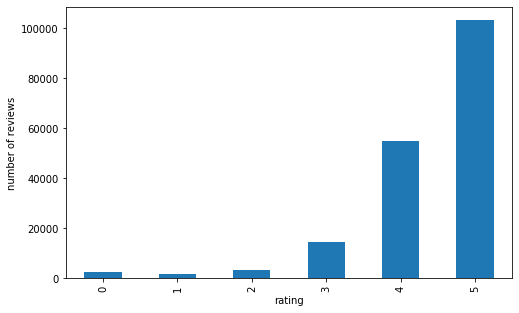

In [17]:
df.groupby('rating')['reviews'].count().plot(kind = 'bar', figsize = (8,5))
plt.ylabel('number of reviews')
plt.savefig('../image/rating.png')

# Data Pre-processing
    1. Cleaning
    2. Removing Stopwords 
    3. Tokenization
    4. Lemmatization
    5. Documents to Bag Of Words
    6. Topic modeling with LDA

In [6]:
# remove unwanted characters, numbers and symbols
df['reviews'] = df['reviews'].str.replace("[^a-zA-Z#]", " ").astype(str)

In [7]:
# load and extend stopwords
stop_words = stopwords.words('english')
stop_words.extend(['strain'])

# remove stopwords from the text
reviews = [remove_stopwords(r.split()) for r in df['reviews']]

# remove short words (length < 3)
df['reviews'] = df['reviews'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

In [8]:
# tokenize words
tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())

In [15]:
!python -m spacy download en # one time run

     |████████████████████████████████| 37.4MB 17.0MB/s eta 0:00:01     |██████████████████████▊         | 26.6MB 10.1MB/s eta 0:00:02
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.0.0-cp36-none-any.whl size=37405977 sha256=9e9d2c52991db6f1d6782b02d288270a5751e3cfabf283f20a0238e9d02e2318
  Stored in directory: /private/var/folders/mh/h54mcy1x3lx61q_snlxzslc40000gn/T/pip-ephem-wheel-cache-vzsqzjd6/wheels/54/7c/d8/f86364af8fbba7258e14adae115f18dd2c91552406edc3fdaa
Successfully built en-core-web-sm

    Linking successful
    /anaconda3/envs/guideldaenv/lib/python3.6/site-packages/en_core_web_sm
    -->
    /anaconda3/envs/guideldaenv/lib/python3.6/site-packages/spacy/data/en

    You can now load the model via spacy.load('en')



In [16]:
nlp = spacy.load('en', disable=['parser', 'ner'])

/anaconda3/envs/guideldaenv/lib/python3.6/site-packages/msgpack_numpy.py:214: DeprecationWarning: encoding is deprecated, Use raw=False instead.
  return _unpackb(packed, **kwargs)
/anaconda3/envs/guideldaenv/lib/python3.6/site-packages/msgpack_numpy.py:214: DeprecationWarning: encoding is deprecated, Use raw=False instead.
  return _unpackb(packed, **kwargs)
/anaconda3/envs/guideldaenv/lib/python3.6/site-packages/msgpack_numpy.py:214: DeprecationWarning: encoding is deprecated, Use raw=False instead.
  return _unpackb(packed, **kwargs)


In [17]:
# Lemmatization
reviews = lemmatization(tokenized_reviews)

/anaconda3/envs/guideldaenv/lib/python3.6/site-packages/msgpack_numpy.py:214: DeprecationWarning: encoding is deprecated, Use raw=False instead.
  return _unpackb(packed, **kwargs)
/anaconda3/envs/guideldaenv/lib/python3.6/site-packages/msgpack_numpy.py:214: DeprecationWarning: encoding is deprecated, Use raw=False instead.
  return _unpackb(packed, **kwargs)
/anaconda3/envs/guideldaenv/lib/python3.6/site-packages/msgpack_numpy.py:214: DeprecationWarning: encoding is deprecated, Use raw=False instead.
  return _unpackb(packed, **kwargs)


In [18]:
dictionary = corpora.Dictionary(reviews)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews]

# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model on NN
lda_model_NN = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=4, random_state=100,
                chunksize=1000, passes=50)

In [19]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model_NN, doc_term_matrix, dictionary)
vis

/anaconda3/envs/guideldaenv/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.148214  0.066121       1        1  33.372871
1     -0.186407  0.199522       2        1  26.324478
3     -0.038058 -0.355438       3        1  23.112238
2      0.372679  0.089795       4        1  17.190420, topic_info=    Category          Freq    Term         Total  loglift  logprob
7    Default  25445.000000   taste  25445.000000  30.0000  30.0000
2    Default  25716.000000    pain  25716.000000  29.0000  29.0000
28   Default  19446.000000     bud  19446.000000  28.0000  28.0000
20   Default  25126.000000    body  25126.000000  27.0000  27.0000
127  Default  19320.000000     day  19320.000000  26.0000  26.0000
..       ...           ...     ...           ...      ...      ...
153   Topic4   1569.883911    gram   3153.407227   1.0633  -4.9386
171   Topic4   1514.827881    name   3189.164795   1.0164  -4.9743
289   Topic4   1817.705933   stuff   8073.350586   0.2698  -4.7920
15    Topic4   1694.664917    weed   7162.178711   0.3195  -4.8621
75    Topic4   1556.869629  strain   7960.164551   0.1290  -4.9469

[201 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
441       1  0.999273  activity
227       2  0.999924   anxiety
387       1  0.153109    anyone
387       2  0.687616    anyone
387       4  0.158945    anyone
...     ...       ...       ...
324       4  0.999646      week
218       2  0.999955      work
326       1  0.139715      year
326       2  0.254993      year
326       4  0.605516      year

[208 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 4, 3])

In [28]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

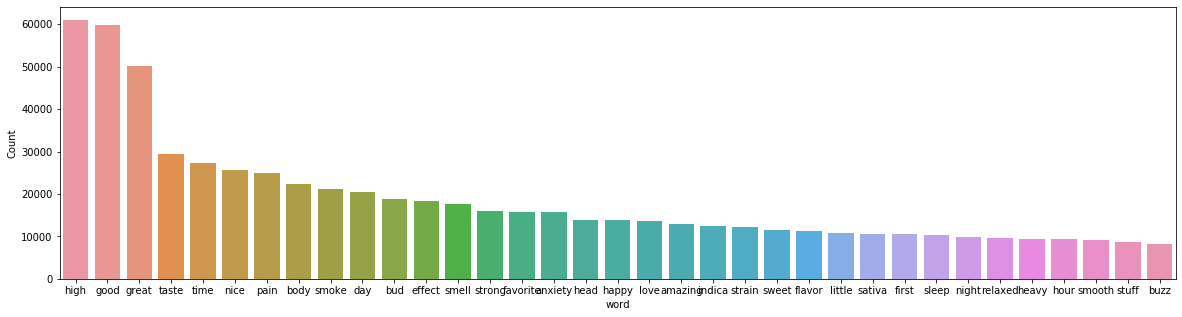

<Figure size 432x288 with 0 Axes>

In [29]:
# words frequency
reviews_2 = []
for i in range(len(reviews)):
    reviews_2.append(' '.join(reviews[i]))
freq_words(reviews_2, 35)
plt.savefig('../figures/word_freq.png')

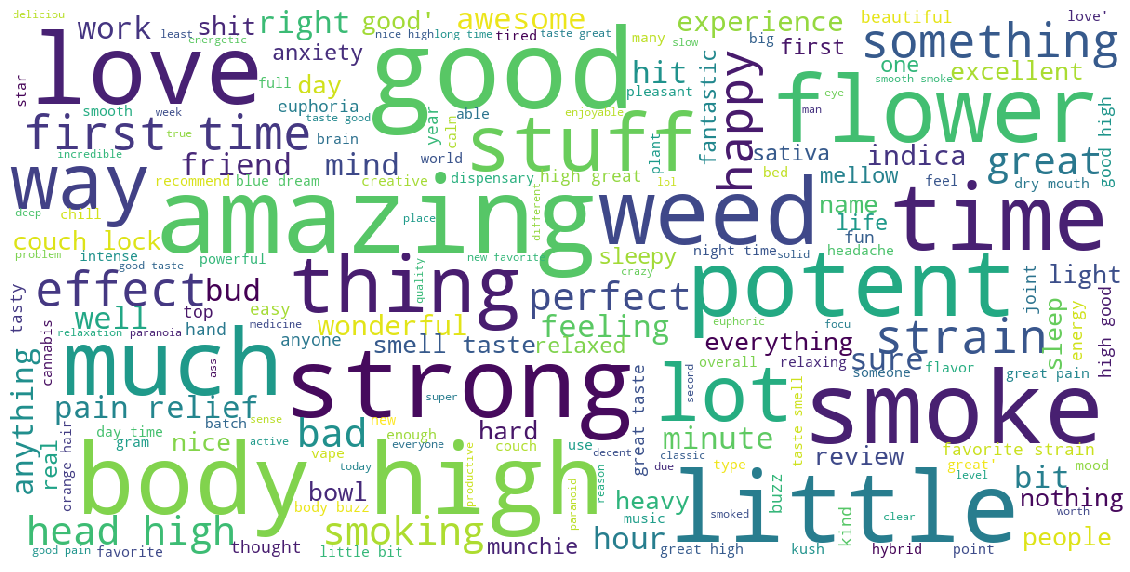

In [30]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(reviews_2)

# Build the bigram and trigram models

In [31]:
df['bigram_tokens'] = add_bigram(tokenized_reviews)
df['trigram_tokens'] = add_trigram(tokenized_reviews)
df.head()

,reviews,rating,strain_name,year,quarter,bigram_tokens,trigram_tokens
0,fire get why hot,5,707 Headband,2016,2,"[fire, get, hot]","[fire, get, hot]"
1,Extremely relaxing Good head space Does well remove stress and pain,4,3X Crazy,2019,4,"[Extremely_relaxing, Good, head, space, Does, well, remove, stress, pain]","[Extremely_relaxing, Good, head_space, Does, well, remove, stress, pain]"
2,really like the taste this strain great for morning and afternoon,5,707 Headband,2016,2,"[really, like, taste, great, morning_afternoon]","[really, like, taste, great, morning_afternoon]"
3,Great flavor takes back when first smoked weed Just the aroma and flavor the weed just nostalgic Recommend every who wants smoke for the first time smoke for the first time long time just smoke ge...,5,3X Crazy,2019,4,"[Great, flavor, takes, back, first, smoked, weed, Just, aroma, flavor, weed, nostalgic, Recommend, every, wants, smoke, first_time, smoke, first_time, long, time, smoke, get, amazing, high, taste,...","[Great, flavor, takes, back, first, smoked, weed, Just, aroma, flavor, weed, nostalgic, Recommend, every, wants, smoke, first_time, smoke, first_time, long_time, smoke, get, amazing, high, taste, ..."
4,This dankkk favourite strain the moment,5,3X Crazy,2019,3,"[This, dankkk, favourite, moment]","[This, dankkk, favourite, moment]"


In [32]:
# Create a dictornary, i.e associate each unique token with unique integer ID
dictionary = corpora.Dictionary(df.trigram_tokens)
print(dictionary)

# Bag of words (document-term matrix)
corpus = [dictionary.doc2bow(text) for text in df.trigram_tokens]
print('Number of documents: %s'%len(corpus))

Dictionary(92783 unique tokens: ['fire', 'get', 'hot', 'Does', 'Extremely_relaxing']...)
Number of documents: 181055


# Topic modeling with LDA

In [ ]:
model_list, topic_coherence = compute_coherence_lda(corpus, dictionary, start=2, limit=40, step=6)

In [ ]:
# Plot
num_topics = range(2, 40, 6)
plt.plot(num_topics, topic_coherence)
plt.xlabel("Number of topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.savefig('../figures/topic_coherence.png')

In [ ]:
# Print the coherence scores
for top, cv in zip(num_topics, topic_coherence):
    print("{} topics  have coherence score of {}".format(top, round(cv, 4)))

In [13]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
optimal_lda_model = LDA(corpus=corpus, id2word=dictionary, num_topics=7, random_state=100,
                chunksize=1000, passes=50)

In [14]:
optimal_lda_model.print_topics()

[(0,
  '0.032*"flower" + 0.028*"shit" + 0.022*"batch" + 0.019*"review" + 0.018*"life" + 0.018*"vape" + 0.016*"music" + 0.015*"smoker" + 0.015*"way" + 0.014*"concentrate"'),
 (1,
  '0.075*"pain" + 0.062*"body" + 0.045*"anxiety" + 0.035*"effect" + 0.033*"head" + 0.027*"day" + 0.024*"time" + 0.022*"relief" + 0.020*"mind" + 0.020*"stress"'),
 (2,
  '0.094*"time" + 0.062*"day" + 0.060*"smoke" + 0.048*"stuff" + 0.047*"couch" + 0.041*"love" + 0.030*"night" + 0.029*"strain" + 0.020*"lock" + 0.017*"friend"'),
 (3,
  '0.104*"taste" + 0.071*"bud" + 0.062*"smell" + 0.044*"flavor" + 0.026*"smoke" + 0.022*"effect" + 0.017*"aroma" + 0.016*"body" + 0.014*"fruity" + 0.013*"nug"'),
 (4,
  '0.026*"high" + 0.019*"tolerance" + 0.016*"year" + 0.015*"quality" + 0.013*"plant" + 0.013*"cannabis" + 0.011*"week" + 0.010*"something" + 0.010*"other" + 0.010*"user"'),
 (5,
  '0.071*"hour" + 0.040*"bowl" + 0.039*"hit" + 0.038*"sleep" + 0.025*"eye" + 0.024*"couple" + 0.022*"minute" + 0.016*"bed" + 0.015*"lol" + 0.013

[(0,
  '0.032*"flower" + 0.028*"shit" + 0.022*"batch" + 0.019*"review" + 0.018*"life" + 0.018*"vape" + 0.016*"music" + 0.015*"smoker" + 0.015*"way" + 0.014*"concentrate"'),
 (1,
  '0.075*"pain" + 0.062*"body" + 0.045*"anxiety" + 0.035*"effect" + 0.033*"head" + 0.027*"day" + 0.024*"time" + 0.022*"relief" + 0.020*"mind" + 0.020*"stress"'),
 (2,
  '0.094*"time" + 0.062*"day" + 0.060*"smoke" + 0.048*"stuff" + 0.047*"couch" + 0.041*"love" + 0.030*"night" + 0.029*"strain" + 0.020*"lock" + 0.017*"friend"'),
 (3,
  '0.104*"taste" + 0.071*"bud" + 0.062*"smell" + 0.044*"flavor" + 0.026*"smoke" + 0.022*"effect" + 0.017*"aroma" + 0.016*"body" + 0.014*"fruity" + 0.013*"nug"'),
 (4,
  '0.026*"high" + 0.019*"tolerance" + 0.016*"year" + 0.015*"quality" + 0.013*"plant" + 0.013*"cannabis" + 0.011*"week" + 0.010*"something" + 0.010*"other" + 0.010*"user"'),
 (5,
  '0.071*"hour" + 0.040*"bowl" + 0.039*"hit" + 0.038*"sleep" + 0.025*"eye" + 0.024*"couple" + 0.022*"minute" + 0.016*"bed" + 0.015*"lol" + 0.013

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
vis